### Data Source: UN Data

In [2]:
import numpy as np #numerical processsind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Population_by_country_2020.csv')
df

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,330610570,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4991,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3458,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1624,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1354,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


- Country(or dependency): Country/Dependent Territories
- Population (2020): Country's Population as at 2020
- Yearly change: Yearly change in population over time in Percentage
- Net Change: Total yearly change
- Density: Population Density in a unit area
- Land Area: Country's Land Area
- Migrants: The number of people leaving a country compared to those entering the country. A negative value shows more people leave the country then those that come in.
- Fert Rate: Country's Fertility rate
- Med Age: Median Age in the country
- Urban Pop%: Percentage Population in the Urban areas
- World share%: Percentage of the world's population the country's population covers.

In [25]:
df.shape

(235, 11)

In [26]:
df.isna().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                  0
Med. Age                    0
Urban Pop %                 0
World Share                 0
dtype: int64

### The idea of this notebook is to explore data, do data visualization and storytelling

- First step is to clean the data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


- From the info above columns like Yearly change, Urban pop, World share needs to be changed to float(numerical data)

In [28]:
data = df.copy()

In [29]:
df['Yearly Change'] = df['Yearly Change'].map(lambda x: x.rstrip('%')).astype(float)

In [30]:
df['Urban Pop %'] = df['Urban Pop %'].map(lambda x: x.rstrip('%')).astype(float)
df['World Share'] = df['World Share'].map(lambda x: x.rstrip('%')).astype(float)

ValueError: could not convert string to float: 'N.A.'

In [31]:
df[df.eq('N.A.').any(1)]

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
49,Venezuela,28451828,-0.28,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
103,Hong Kong,7484618,0.82,60827,7140,1050,29308.0,1.3,45,N.A.,0.10 %
113,Singapore,5840996,0.79,46005,8358,700,27028.0,1.2,42,N.A.,0.08 %
128,Kuwait,4257495,1.51,63488,240,17820,39520.0,2.1,37,N.A.,0.05 %
140,Puerto Rico,2874636,-2.47,-72555,323,8870,-97986.0,1.2,44,N.A.,0.04 %
166,Macao,647508,1.39,8890,21645,30,5000.0,1.2,39,N.A.,0.01 %
175,Guadeloupe,400110,0.02,68,237,1690,-1440.0,2.2,44,N.A.,0.01 %
201,Isle of Man,84942,0.53,449,149,570,NaN,N.A.,N.A.,53 %,0.00 %
202,Andorra,77240,0.16,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
203,Dominica,71950,0.25,178,96,750,NaN,N.A.,N.A.,74 %,0.00 %


In [32]:
df['Fert. Rate'] = df['Fert. Rate'].replace('N.A.', np.nan)
df['Med. Age'] = df['Med. Age'].replace('N.A.', np.nan)
df['Urban Pop %'] = df['Urban Pop %'].replace('N.A.', np.nan)

In [33]:
df.isna().sum()

Country (or dependency)     0
Population (2020)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)             34
Fert. Rate                 34
Med. Age                   34
Urban Pop %                13
World Share                 0
dtype: int64

In [34]:
df.describe(include='all') #to show all columns

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
count,235,2.350000e+02,235.000000,2.350000e+02,235.000000,2.350000e+02,201.000000,201,201,222,235
unique,235,NaN,NaN,NaN,NaN,NaN,NaN,50,34,80,74
top,China,NaN,NaN,NaN,NaN,NaN,NaN,1.8,19,57 %,0.00 %
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,14,14,7,57
mean,NaN,3.309773e+07,1.104553,3.460878e+05,475.770213,5.535918e+05,6.283582,NaN,NaN,NaN,NaN
std,NaN,1.349417e+08,1.075647,1.128260e+06,2331.285935,1.687796e+06,123291.887548,NaN,NaN,NaN,NaN
min,NaN,8.010000e+02,-2.470000,-3.838400e+05,0.000000,0.000000e+00,-653249.000000,NaN,NaN,NaN,NaN
25%,NaN,3.981150e+05,0.320000,4.240000e+02,37.000000,2.545000e+03,-10047.000000,NaN,NaN,NaN,NaN
50%,NaN,5.459116e+06,0.970000,3.917000e+04,95.000000,7.724000e+04,-852.000000,NaN,NaN,NaN,NaN
75%,NaN,2.045283e+07,1.850000,2.496600e+05,239.500000,4.038200e+05,9741.000000,NaN,NaN,NaN,NaN


In [35]:
df['Urban Pop %'].fillna('57 %', inplace = True) #57% is the mode 4rm info above

In [36]:
df.dropna(inplace = True)

In [37]:
df.isna().sum()

Country (or dependency)    0
Population (2020)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

In [39]:
assert sum(df.isnull().sum())==0 #checking for missing value

In [40]:
df.shape

(201, 11)

In [41]:
df['Urban Pop %'] = df['Urban Pop %'].map(lambda x: x.rstrip('%')).astype(float)
df['World Share'] = df['World Share'].map(lambda x: x.rstrip('%')).astype(float)

In [42]:
df.dtypes

Country (or dependency)     object
Population (2020)            int64
Yearly Change              float64
Net Change                   int64
Density (P/Km²)              int64
Land Area (Km²)              int64
Migrants (net)             float64
Fert. Rate                  object
Med. Age                    object
Urban Pop %                float64
World Share                float64
dtype: object

In [43]:
df['Fert. Rate'] = df['Fert. Rate'].astype(float)
df['Med. Age'] = df['Med. Age'].astype(int)

In [44]:
df.dtypes

Country (or dependency)     object
Population (2020)            int64
Yearly Change              float64
Net Change                   int64
Density (P/Km²)              int64
Land Area (Km²)              int64
Migrants (net)             float64
Fert. Rate                 float64
Med. Age                     int32
Urban Pop %                float64
World Share                float64
dtype: object

In [45]:
df.tail()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
196,Aruba,106675,0.43,452,593,180,201.0,1.9,41,44.0,0.0
197,Tonga,105449,1.15,1201,147,720,-800.0,3.6,22,24.0,0.0
198,U.S. Virgin Islands,104456,-0.15,-153,298,350,-451.0,2.0,43,96.0,0.0
199,Seychelles,98224,0.62,608,214,460,-200.0,2.5,34,56.0,0.0
200,Antigua and Barbuda,97764,0.84,811,223,440,0.0,2.0,34,26.0,0.0


### Let's answer questions about our using visualiztion

'What can this data tell us?'

- What are the top 10 most populated countries and least 10?
- What 10 countries have the highest yearly population increase?
- What 10 countries have the least?
- What are the 10 countries with the highest negative yearly change? Perhaps there are low fertility rate and high migration rate.
- Is there a relationship between the yearly change and the fertility rate
- What age bracket exists most as countries Median Age.
- Check for the countries with the highest and least fertility rate, to gain insights on their Urban Population and Median Age
- Compare the Population Density to the Land Area.
- Compare the Migrant net to countries with likely "low poverty rate".

In [46]:
%matplotlib inline #makes visualization to be nicer

### 1. What are the least and most populated countries?

In [47]:
top_10 = df.sort_values(by="Population (2020)", ascending=False).head(10)
#bottom_10 = df.sort_values(by="Population (2020)", ascending=False).tail(10)
bottom_10 = df.sort_values(by="Population (2020)", ascending=True).head(10)

In [48]:
bottom_10

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
200,Antigua and Barbuda,97764,0.84,811,223,440,0.0,2.0,34,26.0,0.0
199,Seychelles,98224,0.62,608,214,460,-200.0,2.5,34,56.0,0.0
198,U.S. Virgin Islands,104456,-0.15,-153,298,350,-451.0,2.0,43,96.0,0.0
197,Tonga,105449,1.15,1201,147,720,-800.0,3.6,22,24.0,0.0
196,Aruba,106675,0.43,452,593,180,201.0,1.9,41,44.0,0.0
195,St. Vincent & Grenadines,110869,0.32,351,284,390,-200.0,1.9,33,53.0,0.0
194,Grenada,112418,0.46,520,331,340,-200.0,2.1,32,35.0,0.0
193,Micronesia,114776,1.06,1208,164,700,-600.0,3.1,24,21.0,0.0
192,Kiribati,119069,1.57,1843,147,810,-800.0,3.6,23,57.0,0.0
191,Curaçao,163958,0.41,669,370,444,515.0,1.8,42,89.0,0.0


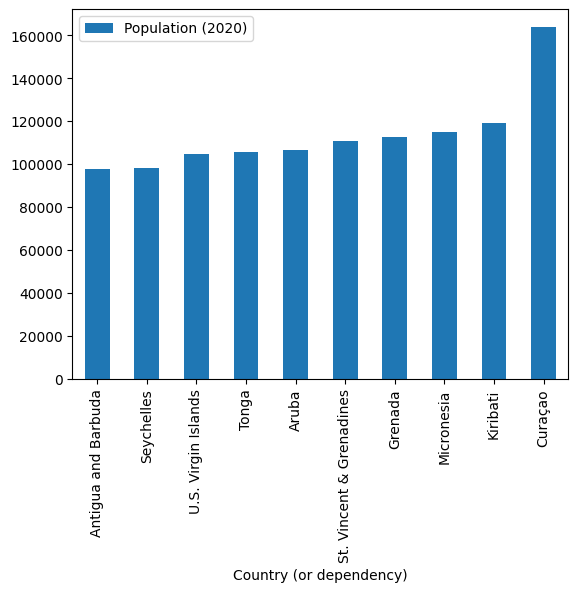

In [50]:
bottom_10.plot(x = 'Country (or dependency)', y= 'Population (2020)', kind = 'bar');

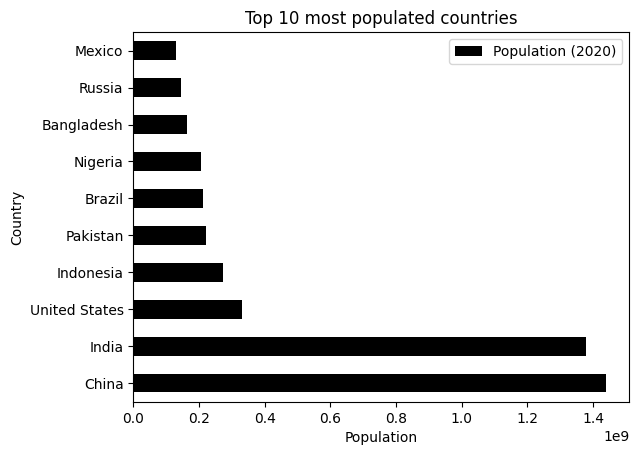

In [52]:
top_10.plot(x='Country (or dependency)', y='Population (2020)', kind='barh', rot=0, color='black')
plt.ylabel('Country')
plt.xlabel('Population')
plt.title('Top 10 most populated countries');

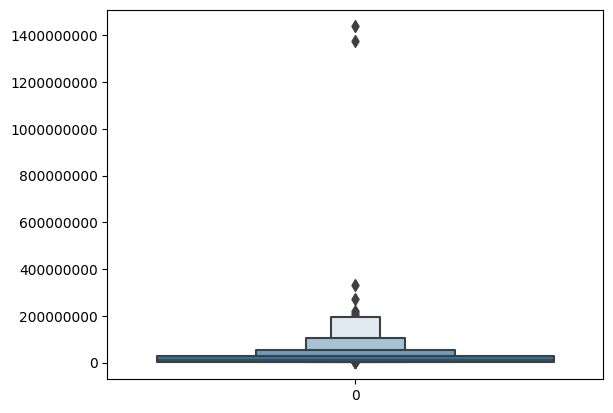

In [53]:
sns.boxenplot(data=df['Population (2020)'])
plt.ticklabel_format(style='plain', axis ='y')

Based on our previous stat class, what can you deduce from the box plot?

### 2. Countries with highest yearly change

In [55]:
Top_YearlyChange = df.sort_values(by="Yearly Change", ascending=False).head(10)

In [56]:
Top_YearlyChange

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
55,Niger,24014064,3.84,895929,19,1266700,4000.0,7.0,15,17.0,0.31
151,Bahrain,1688629,3.68,60403,2239,760,47800.0,2.0,32,89.0,0.02
152,Equatorial Guinea,1392950,3.47,46999,50,28050,16000.0,4.6,22,73.0,0.02
30,Uganda,45427637,3.32,1471413,229,199810,168694.0,5.0,17,26.0,0.59
43,Angola,32644783,3.27,1040977,26,1246700,6413.0,5.6,17,67.0,0.42
15,DR Congo,88972681,3.19,2770836,40,2267050,23861.0,6.0,17,46.0,1.15
77,Burundi,11814346,3.12,360204,463,25680,2001.0,5.5,17,14.0,0.15
59,Mali,20125282,3.02,592802,17,1220190,-40000.0,5.9,16,44.0,0.26
71,Chad,16324440,3.00,478988,13,1259200,2000.0,5.8,17,23.0,0.21
23,Tanzania,59368313,2.98,1728755,67,885800,-40076.0,4.9,18,37.0,0.77


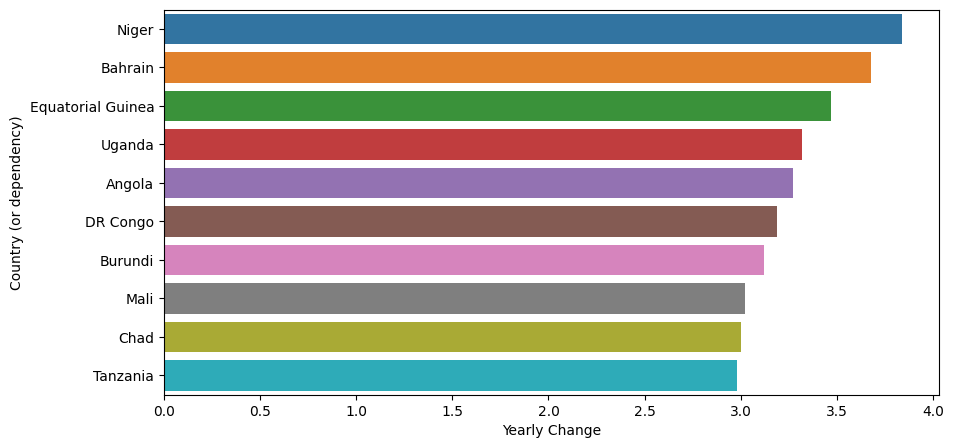

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x='Yearly Change', y='Country (or dependency)', data=Top_YearlyChange);

In [58]:
least_YearlyChange = df.sort_values(by="Yearly Change", ascending=True).head(10)

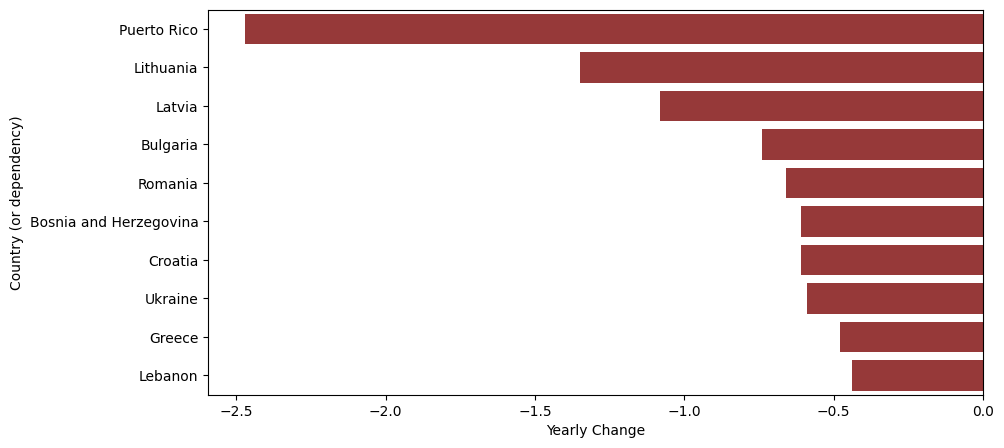

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x='Yearly Change', y='Country (or dependency)', data=least_YearlyChange, color='brown');

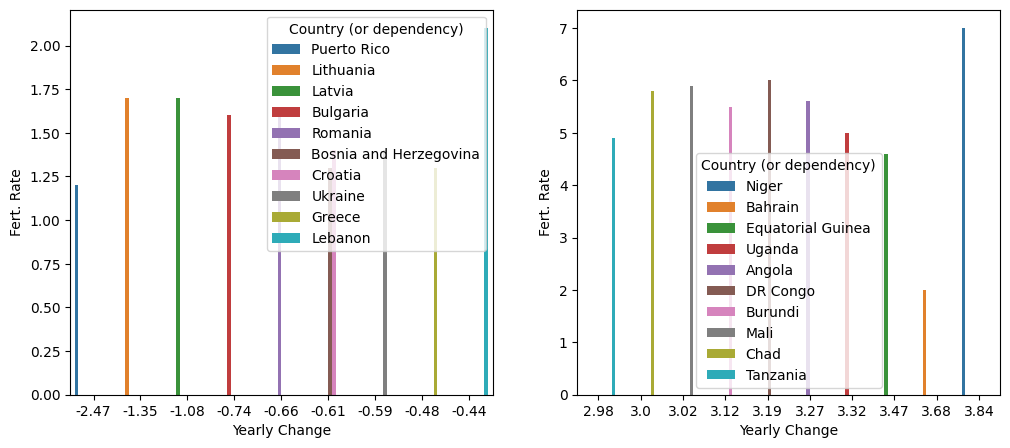

In [60]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1) #1 row, 2 cols, 1st plot
sns.barplot(x='Yearly Change', y='Fert. Rate', hue = least_YearlyChange['Country (or dependency)'],
            data=least_YearlyChange)

plt.subplot(1,2,2) #1 row, 2 cols, 2nd plot
sns.barplot(x='Yearly Change', y='Fert. Rate', hue = Top_YearlyChange['Country (or dependency)'],
            data=Top_YearlyChange);

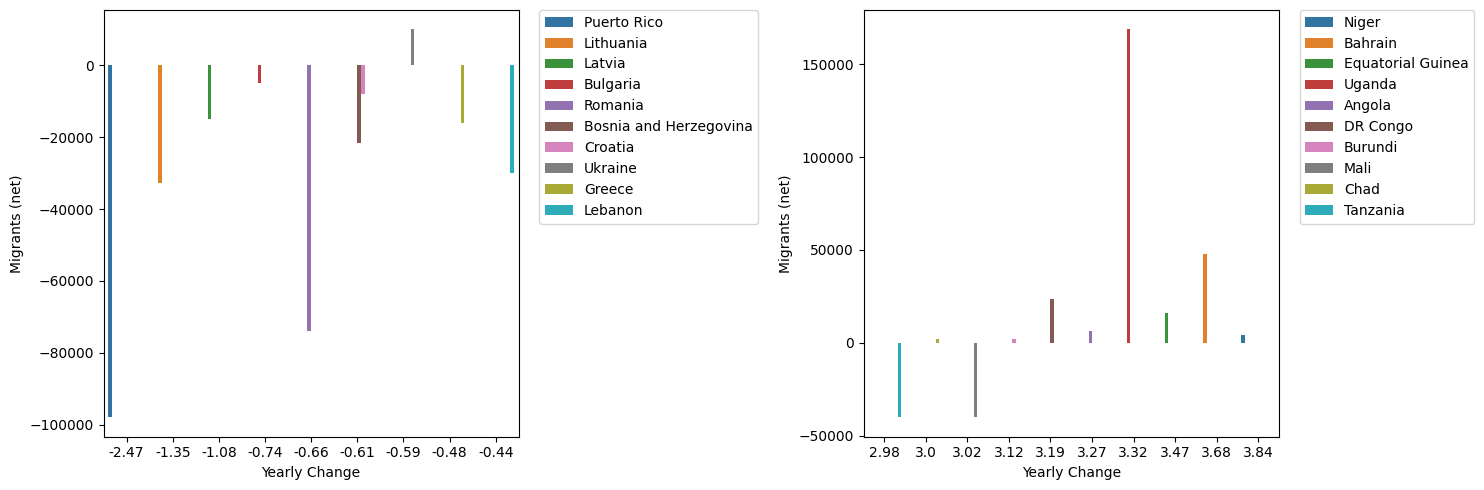

In [61]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(x='Yearly Change', y='Migrants (net)', 
            hue = least_YearlyChange['Country (or dependency)'],
            data=least_YearlyChange)
plt.legend(bbox_to_anchor= (1.05,1), borderaxespad= 0)

plt.subplot(1,2,2)
sns.barplot(x='Yearly Change', y='Migrants (net)', 
            hue = Top_YearlyChange['Country (or dependency)'],
            data=Top_YearlyChange)
plt.legend(bbox_to_anchor= (1.05,1), borderaxespad= 0)

plt.tight_layout()
plt.show()

In [62]:
df.corr()

,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Population (2020),1.000000,-0.034384,0.849833,-0.019316,0.448664,-0.266999,-0.049534,0.019547,-0.041090,0.999998
Yearly Change,-0.034384,1.000000,0.174701,-0.007345,-0.020819,-0.016159,0.823665,-0.842458,-0.331765,-0.034007
Net Change,0.849833,0.174701,1.000000,-0.027255,0.293923,-0.302188,0.166176,-0.192004,-0.168311,0.850168
Density (P/Km²),-0.019316,-0.007345,-0.027255,1.000000,-0.062558,0.000155,-0.152183,0.141902,-0.010780,-0.019162
Land Area (Km²),0.448664,-0.020819,0.293923,-0.062558,1.000000,0.225414,-0.045694,0.062868,0.132162,0.448530
Migrants (net),-0.266999,-0.016159,-0.302188,0.000155,0.225414,1.000000,-0.113249,0.190334,0.251852,-0.266912
Fert. Rate,-0.049534,0.823665,0.166176,-0.152183,-0.045694,-0.113249,1.000000,-0.882256,-0.474535,-0.049309
Med. Age,0.019547,-0.842458,-0.192004,0.141902,0.062868,0.190334,-0.882256,1.000000,0.518977,0.019282
Urban Pop %,-0.041090,-0.331765,-0.168311,-0.010780,0.132162,0.251852,-0.474535,0.518977,1.000000,-0.041130
World Share,0.999998,-0.034007,0.850168,-0.019162,0.448530,-0.266912,-0.049309,0.019282,-0.041130,1.000000


We can better visualize correlation with a heatmap and or their linear relationship

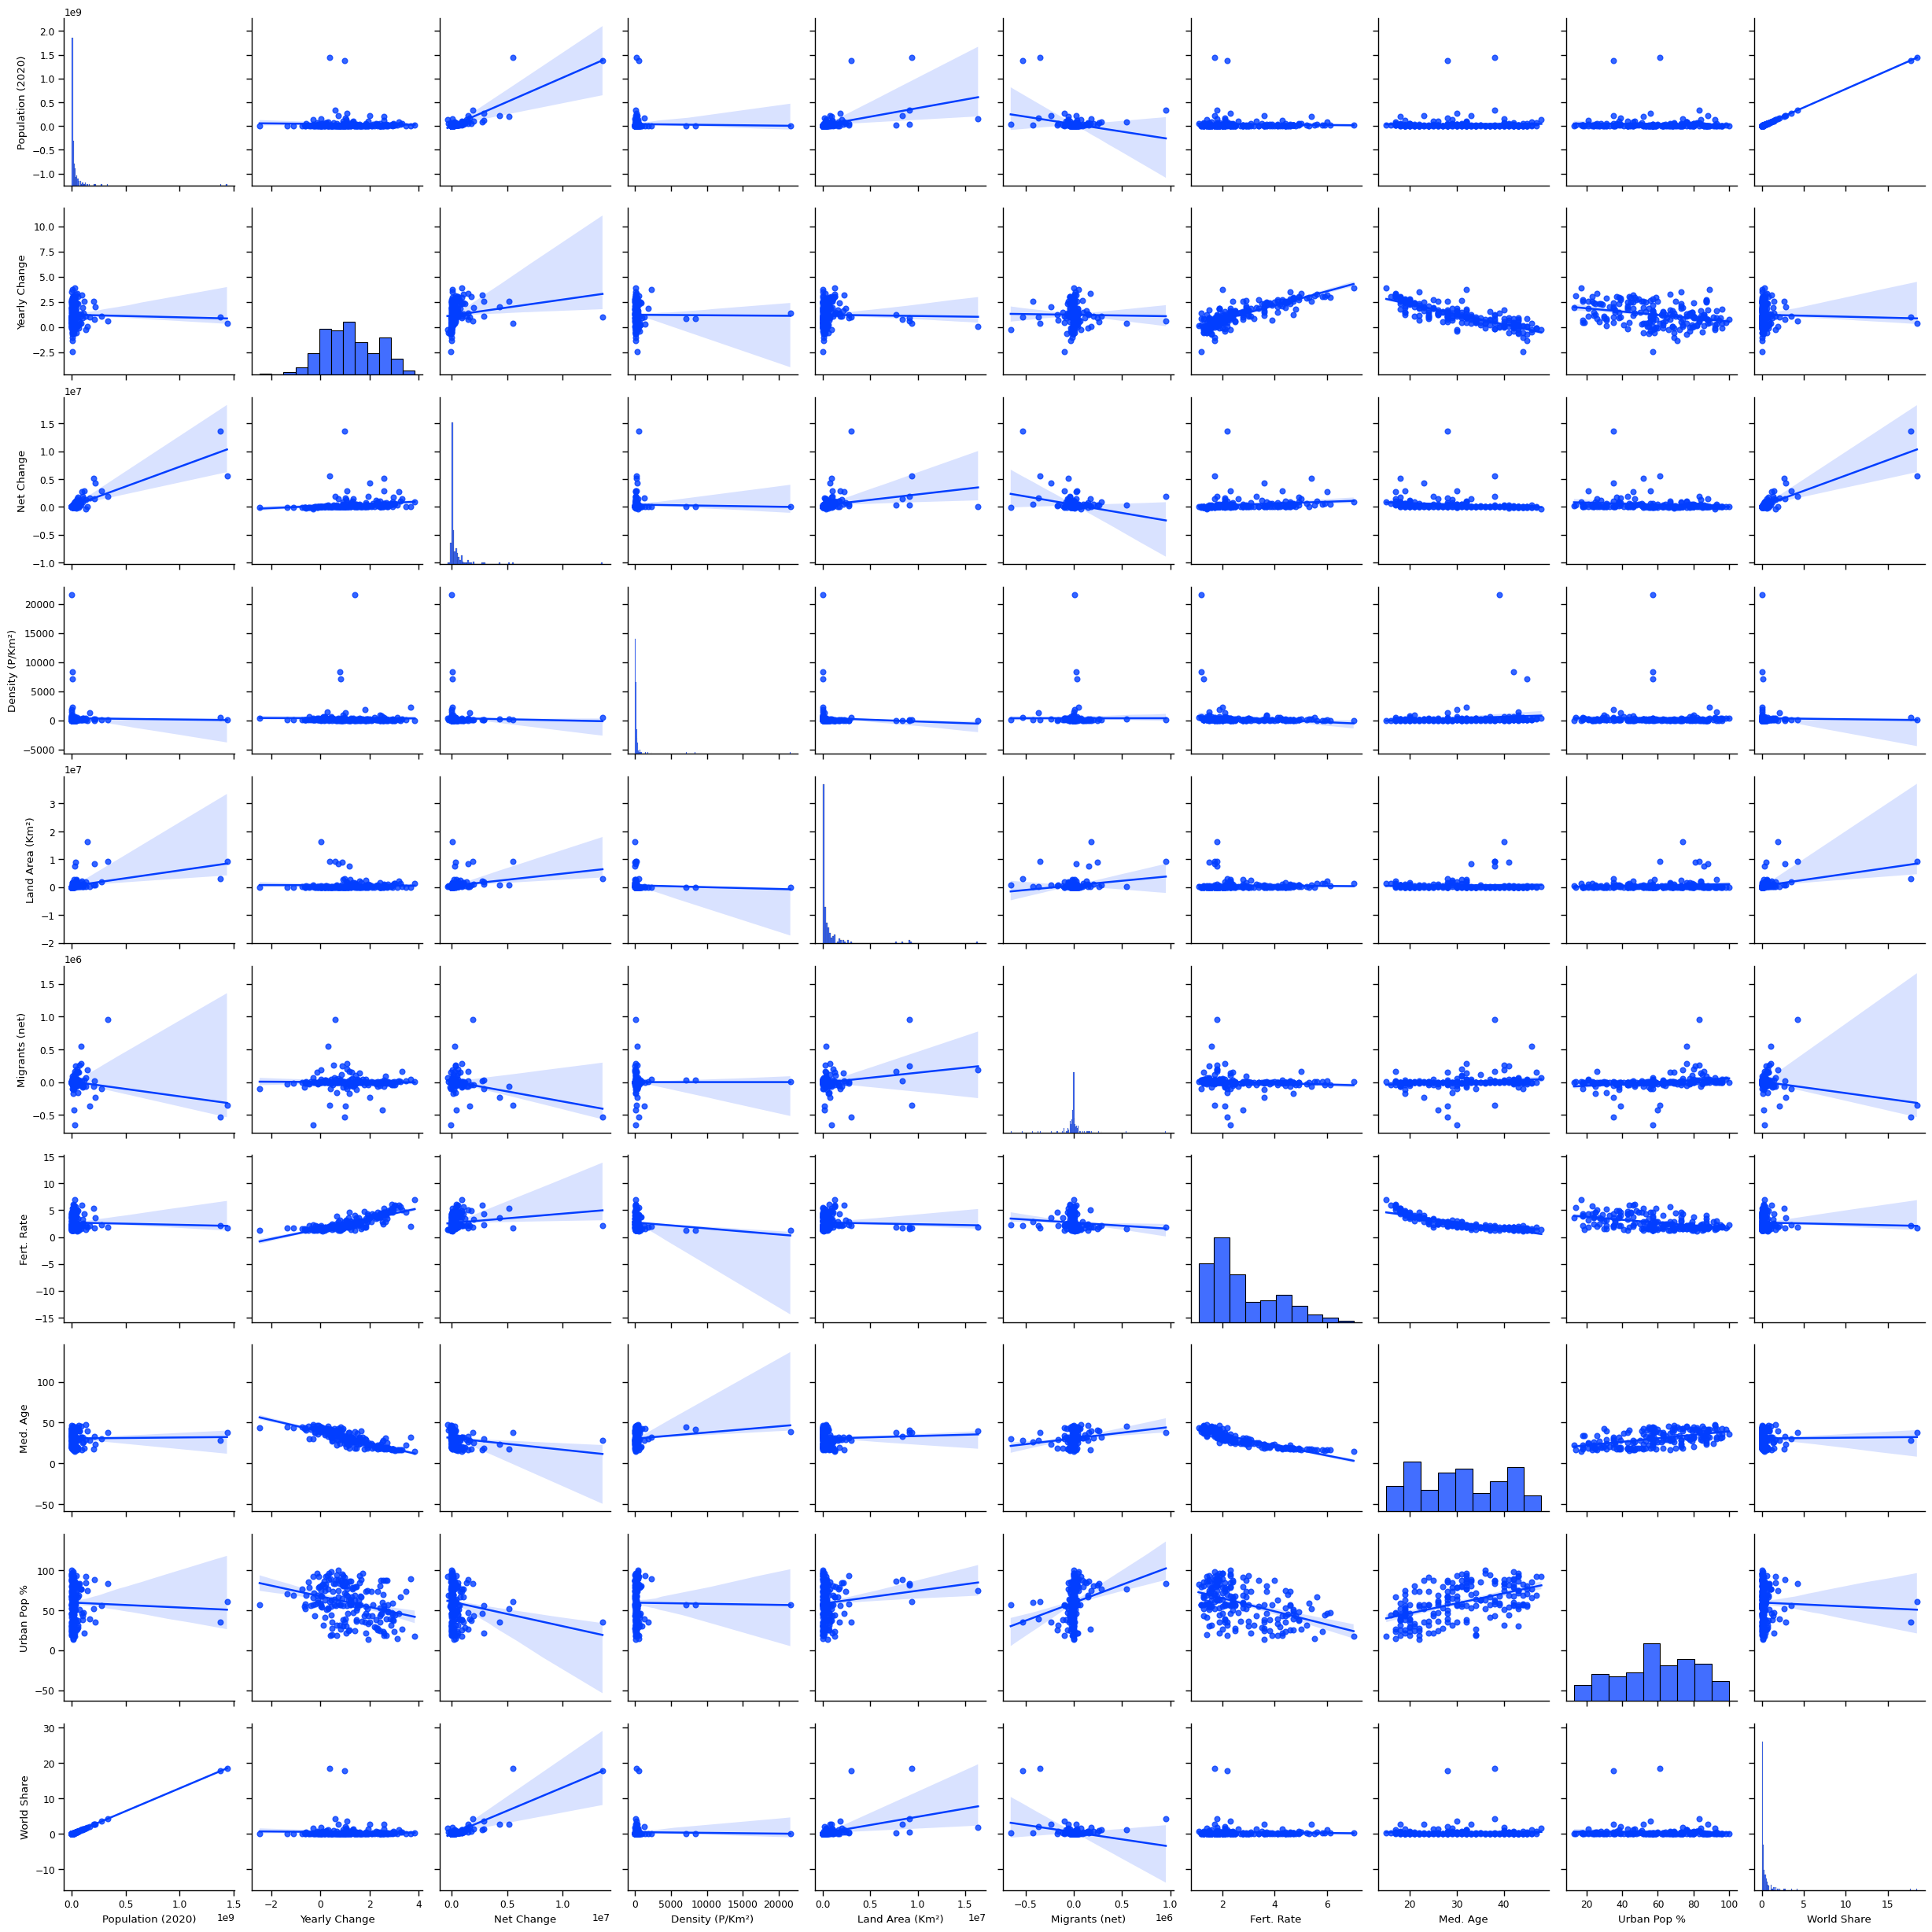

In [63]:
sns.set_context('paper')
sns.set_palette('bright')
sns.pairplot(df, kind='reg');

relationships to further explore

- Median age and yearly change
- fertility rate and yearly change
- median age and fertility rate
- migrants and fertility rate

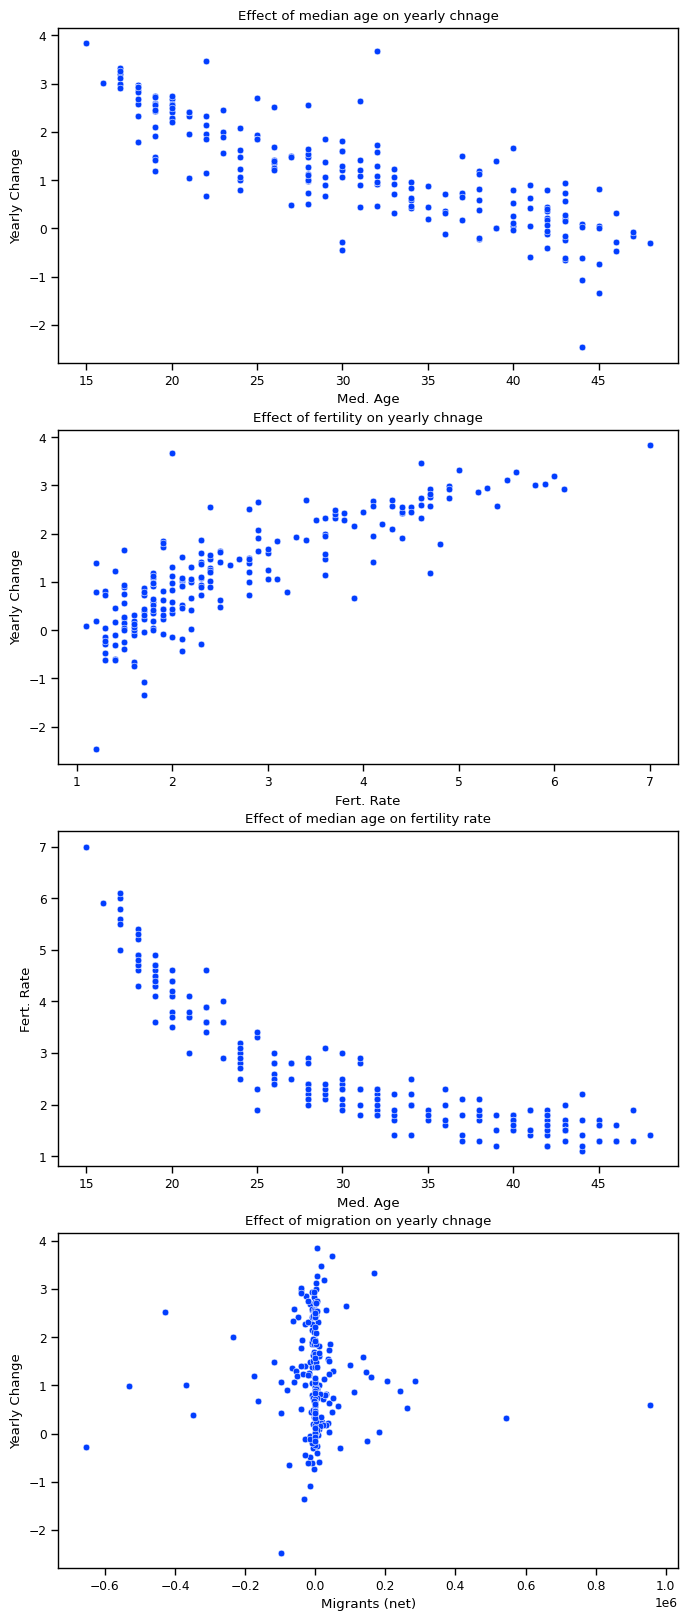

In [64]:
plt.figure(figsize=(8,20))

plt.subplot(4,1,1)
sns.scatterplot(x='Med. Age', y='Yearly Change', data=df)
plt.title('Effect of median age on yearly chnage')

plt.subplot(4,1,2)
sns.scatterplot(x='Fert. Rate', y='Yearly Change', data=df)
plt.title('Effect of fertility on yearly chnage')

plt.subplot(4,1,3)
sns.scatterplot(x='Med. Age', y='Fert. Rate', data=df)
plt.title('Effect of median age on fertility rate')

plt.subplot(4,1,4)
sns.scatterplot(x='Migrants (net)', y='Yearly Change', data=df)
plt.title('Effect of migration on yearly chnage')


plt.show(sns)

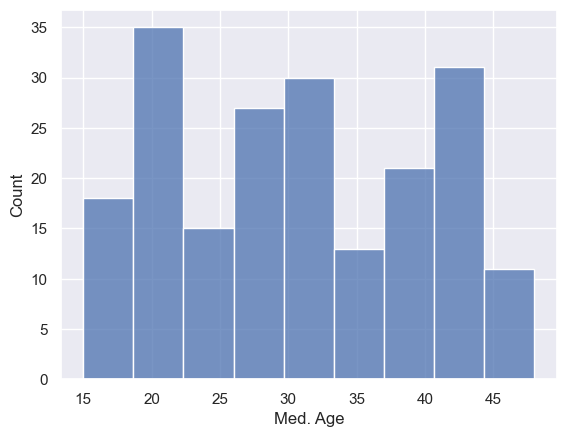

In [65]:
#What agee bracket exist most in the median age

sns.set_theme(style='darkgrid')
sns.histplot(df['Med. Age'])

plt.savefig('mean_age_in_the_world.png', dpi=300) #saveplot

- Check for the countries with the highest and least fertility rate, to gain insights on their Urban Population and Median Age
- Compare the Population Density to the Land Area.
- Compare the Migrant net to countries with likely "low poverty rate".

In [66]:
high_fert = df.sort_values(by='Fert. Rate', ascending=False).head(10)
low_fert = df.sort_values(by='Fert. Rate', ascending=True).head(10)

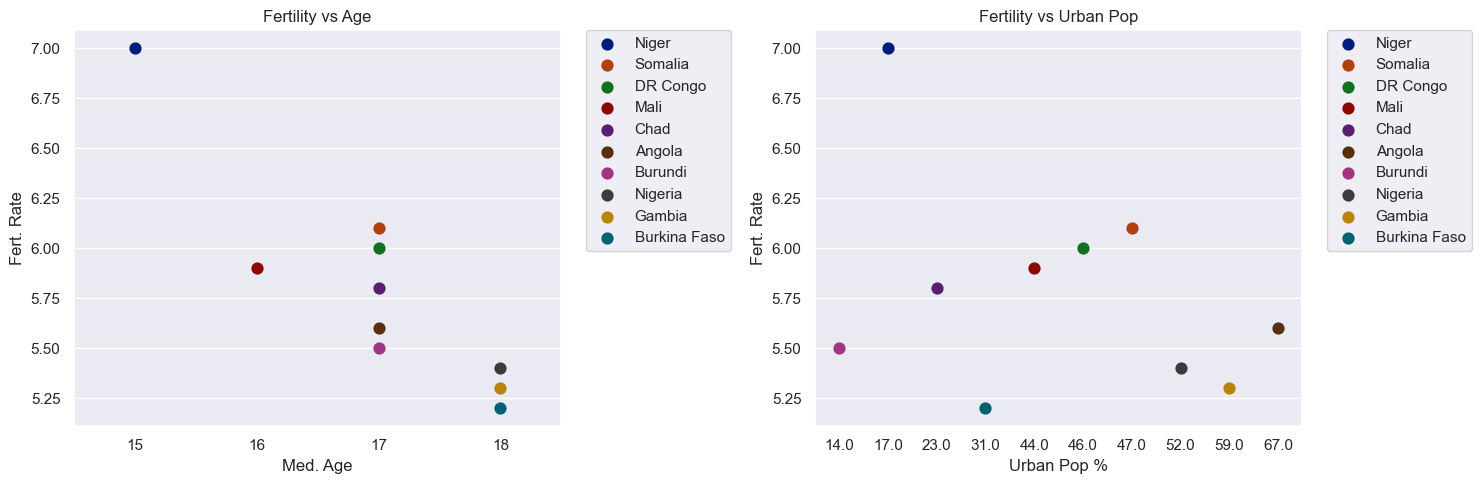

In [67]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.pointplot(data=high_fert,
             x='Med. Age', y = 'Fert. Rate',
             hue ='Country (or dependency)', 
             palette = 'dark')
plt.legend(bbox_to_anchor= (1.05,1), loc=2, borderaxespad = 0)
plt.title('Fertility vs Age')

plt.subplot(1,2,2)
sns.pointplot(data=high_fert,
             x='Urban Pop %', y = 'Fert. Rate',
             hue ='Country (or dependency)', 
             palette = 'dark')
plt.legend(bbox_to_anchor= (1.05,1),loc=2, borderaxespad = 0)
plt.title('Fertility vs Urban Pop')

plt.tight_layout()
plt.show()